[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ibeatles-strain-mapping-hdf5-loader/)

<img src='__docs/__all/notebook_rules.png' />

# Select Your IPTS 

In [1]:
import warnings
warnings.filterwarnings('ignore')

from __code.ibeatles_strain_mapping_hdf5_loader.main import Main
from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

%matplotlib notebook

# Select HDF5 file created in the strain step of iBeatles

<img src='__code/ibeatles_strain_mapping_hdf5_loader/static/ibeatles_export_as_hdf5_menu.png' />

In [2]:
o_strain_display = Main(working_dir = system.System.get_working_dir())
#o_strain_display.select_hdf5_file()
#hdf_file = "/Users/j35/Desktop/fitting_y2023_m10_d24_h09_mn05.h5"
hdf_file = "/Users/j35/Desktop/fitting_y2023_m10_d25_h12_mn55.h5"
o_strain_display.load(hdf_file)

# Display data 

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import griddata
from matplotlib.image import _resample
from matplotlib.transforms import Affine2D

<IPython.core.display.Javascript object>


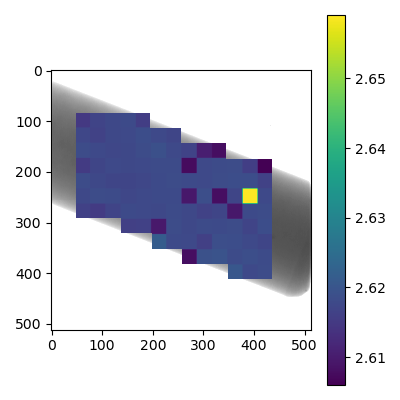

interactive(children=(FloatSlider(value=2.6060129175602396, description='min_value', max=2.6590903866703424, m…

<IPython.core.display.Javascript object>


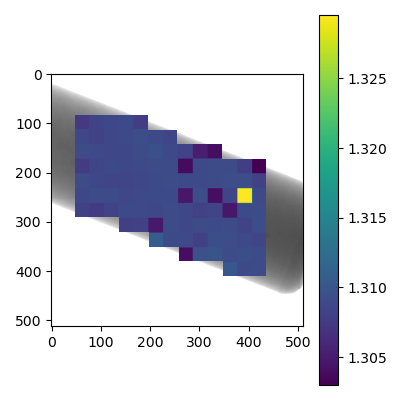

interactive(children=(FloatSlider(value=1.3030064587801198, description='min_value', max=1.3295451933351712, m…

<IPython.core.display.Javascript object>


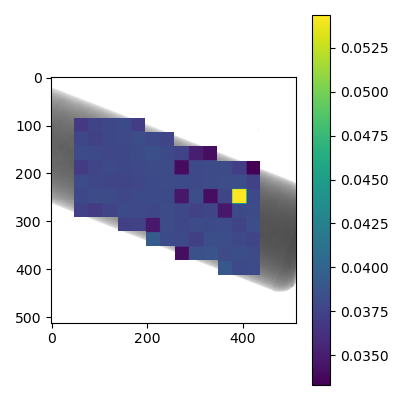

interactive(children=(FloatSlider(value=0.03331202123720847, description='min_value', max=0.05435780597555217,…

In [4]:
o_strain_display.process_data()
o_strain_display.display()   

<IPython.core.display.Javascript object>


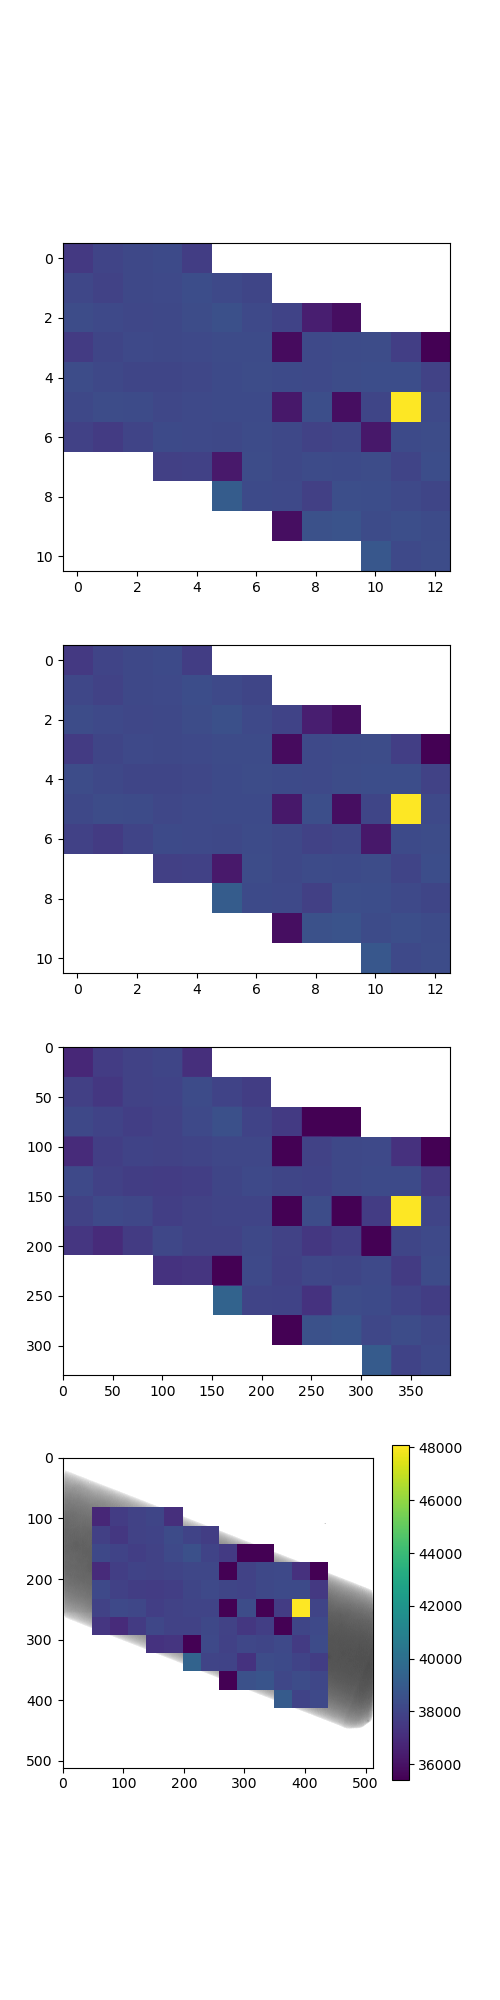

interactive(children=(FloatSlider(value=0.03540242690011038, description='min (x1e6)', max=0.04808252248169752…

In [5]:
o_strain_display.display_with_interpolation()